# 2D Visualization using PCA

In [1]:
#Loading MNIST Data

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

mnist_data = pd.read_csv('./mnist_train.csv')
mnist_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Store the labels into variable label.
label = mnist_data['label']

# Drop the label column and store the pixel data into variable pixel_data.
pixel_data = mnist_data.drop("label", axis = 1)
print(label.shape)
print(pixel_data.shape)

(42000,)
(42000, 784)


In [3]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(pixel_data)
print(standardized_data.shape)

(42000, 784)


In [4]:
# Initializing a PCA.

from sklearn import decomposition
pca = decomposition.PCA()

In [5]:
# The number of component = 2
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)


In [6]:
# After PCA the dimensions will be reduced to 2-D.
print(pca_data.shape)

(42000, 2)


In [7]:
# Attaching the label for each 2-d data point.

pca_data = np.vstack((pca_data.T,label)).T
pca_data.shape

(42000, 3)

In [8]:
#Creating a new data
pca_df = pd.DataFrame(data = pca_data, columns =("1st_Principal","2nd_Principal", "Label"))
print(pca_df.head(5))

   1st_Principal  2nd_Principal  Label
0      -5.140481      -5.225858    1.0
1      19.292322       6.032582    0.0
2      -7.644497      -1.706329    1.0
3      -0.474218       5.835912    4.0
4      26.559571       6.024649    0.0


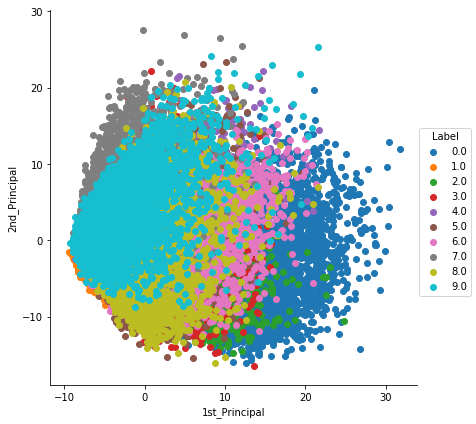

In [9]:
# Ploting a new data.
import seaborn as sns
sns.FacetGrid(pca_df, hue="Label", size=6).map(plt.scatter, "1st_Principal", "2nd_Principal").add_legend()
plt.show()

# PCA for dimensionality redcution

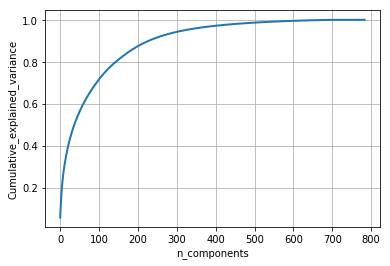

In [10]:
pca.n_components = 784
pca_data = pca.fit_transform(standardized_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

### Observation:

If we take 200 dimensions, approx. 90% variance is explained.